In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

In [70]:
def f(x):
    return 2 + np.sin(x) * np.cos(2*x-15)*2

def df(x):
    return 2 * np.cos(x) * np.cos(2 * x - 15) - 4 * np.sin(x) * np.sin(2 * x - 15)

def calcCyclicLr(x, stepsize, y, y_max):
    n_steps = (y_max - y) / stepsize    
    cycle = (math.floor(x / n_steps) + 1)
    cycle_step = x - ((cycle - 1) * n_steps)    
    if (cycle % 2) == 0:
        return y_max - cycle_step * stepsize
    else:
        return cycle_step * stepsize + y

    # cycle = math.floor(1 + epoch / (2 * stepsize))    
    # x = abs(epoch / stepsize - 2 * cycle + 1)    
    # calcedLR = lr + (maxLr - lr) * max(0, (1-x))    
    # return calcedLR

x = np.linspace(5, 12, 200)
y = f(x)

csvfile = "gradient-descent-run.csv"

Open a CSV file and write a header into it.

In [71]:
def startCSV():
    with open(csvfile, 'w', newline='') as _csvfile:
        writer = csv.writer(_csvfile, dialect='excel', delimiter=';')
        writer.writerow(['X', 'Y', 'gd ' + str(1e-1), 'LR', ])

def writeRow(X, Y, GD, LR):
    with open(csvfile, 'a', newline='') as _csvfile:
        writer = csv.writer(_csvfile, delimiter=';')
        writer.writerow([X, Y, GD, LR, ])

In [72]:
# x_start = 7
# dy_dx_old = df(x_start)
# dy_dx_new = 0

# lr = 0.1
# maxLr = 1
# stepsize = 0.15
# tolerance = 1e-1
# index = 0

In [73]:
x_start = 7.5
dy_dx_old = df(x_start)
dy_dx_new = 0

lr = 0.1
maxLr = 1
stepsize = 0.15
tolerance = 1e-1
index = 0

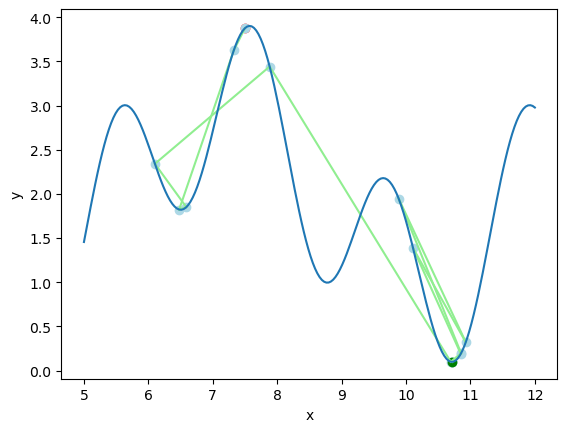

In [74]:
plt.scatter(x_start, f(x_start), c='red')
startCSV()

gd = abs(dy_dx_new - dy_dx_old)

while gd > tolerance:
    x_temp = x_start
    dy_dx_old = dy_dx_new
    _lr = calcCyclicLr(index, stepsize, lr, maxLr)
    x_start = x_start - _lr * dy_dx_old
    dy_dx_new = df(x_start)
    plt.scatter(x_start, f(x_start), c='lightblue')
    plt.plot([x_temp, x_start], [f(x_temp), f(x_start)], c='lightgreen')
    gd = abs(dy_dx_new - dy_dx_old)
    writeRow(x_temp, f(x_temp), gd, _lr)
    index+=1   
 
plt.scatter(x_start, f(x_start), c='green')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show()